# Basic Time Series Forecasting

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## 1. Rolling Mean for Detecting Temporal Variation

Let's use the principle of rolling mean to build a time series model which could help predict stock price values

In [2]:
df = pd.read_csv('./data/stocks.csv', index_col = 'Date', parse_dates = ['Date'])
df.shape

(93612, 6)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


Let's focus on the google stocks

In [4]:
stocks_google = df.query('Name == "GOOGL"')
stocks_google['Ticks'] = range(len(stocks_google))   # add a ticks column
stocks_google.head()

,Open,High,Low,Close,Volume,Name,Ticks
Date,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,3
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,4


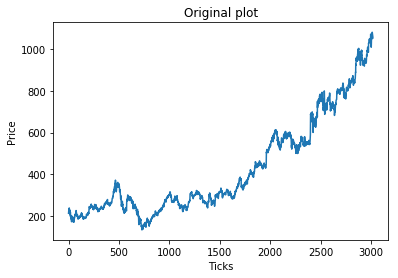

In [5]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Original plot')
ax1.plot('Ticks', 'Open', data = stocks_google)

Now, let's calculate the rolling mean

In [8]:
stocks_google['Rolling_Mean'] = stocks_google['Open'].rolling(window = 80).mean()
stocks_google.head()

,Open,High,Low,Close,Volume,Name,Ticks,Rolling_Mean
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1,NaN
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2,NaN
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,3,NaN
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,4,NaN


Text(0.5, 1.0, 'Smoothed rolling mean')

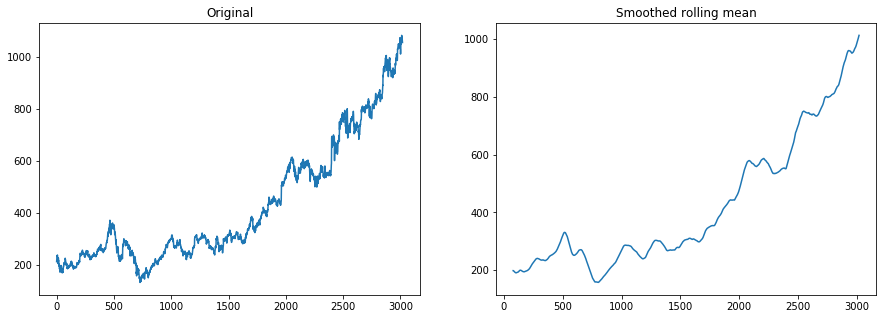

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axes[0].plot('Ticks', 'Open', data = stocks_google)
axes[0].set_title('Original')

axes[1].plot('Ticks', 'Rolling_Mean', data = stocks_google)
axes[1].set_title('Smoothed rolling mean')